In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.mode.chained_assignment = None

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12, 10)
mpl.rcParams.update({'font.size':22})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

print('Done')

Done


# Read source files
## Read data for each of p values and combined them
## $M(\omega, p)=0$ for all $p$ when $\omega=0$

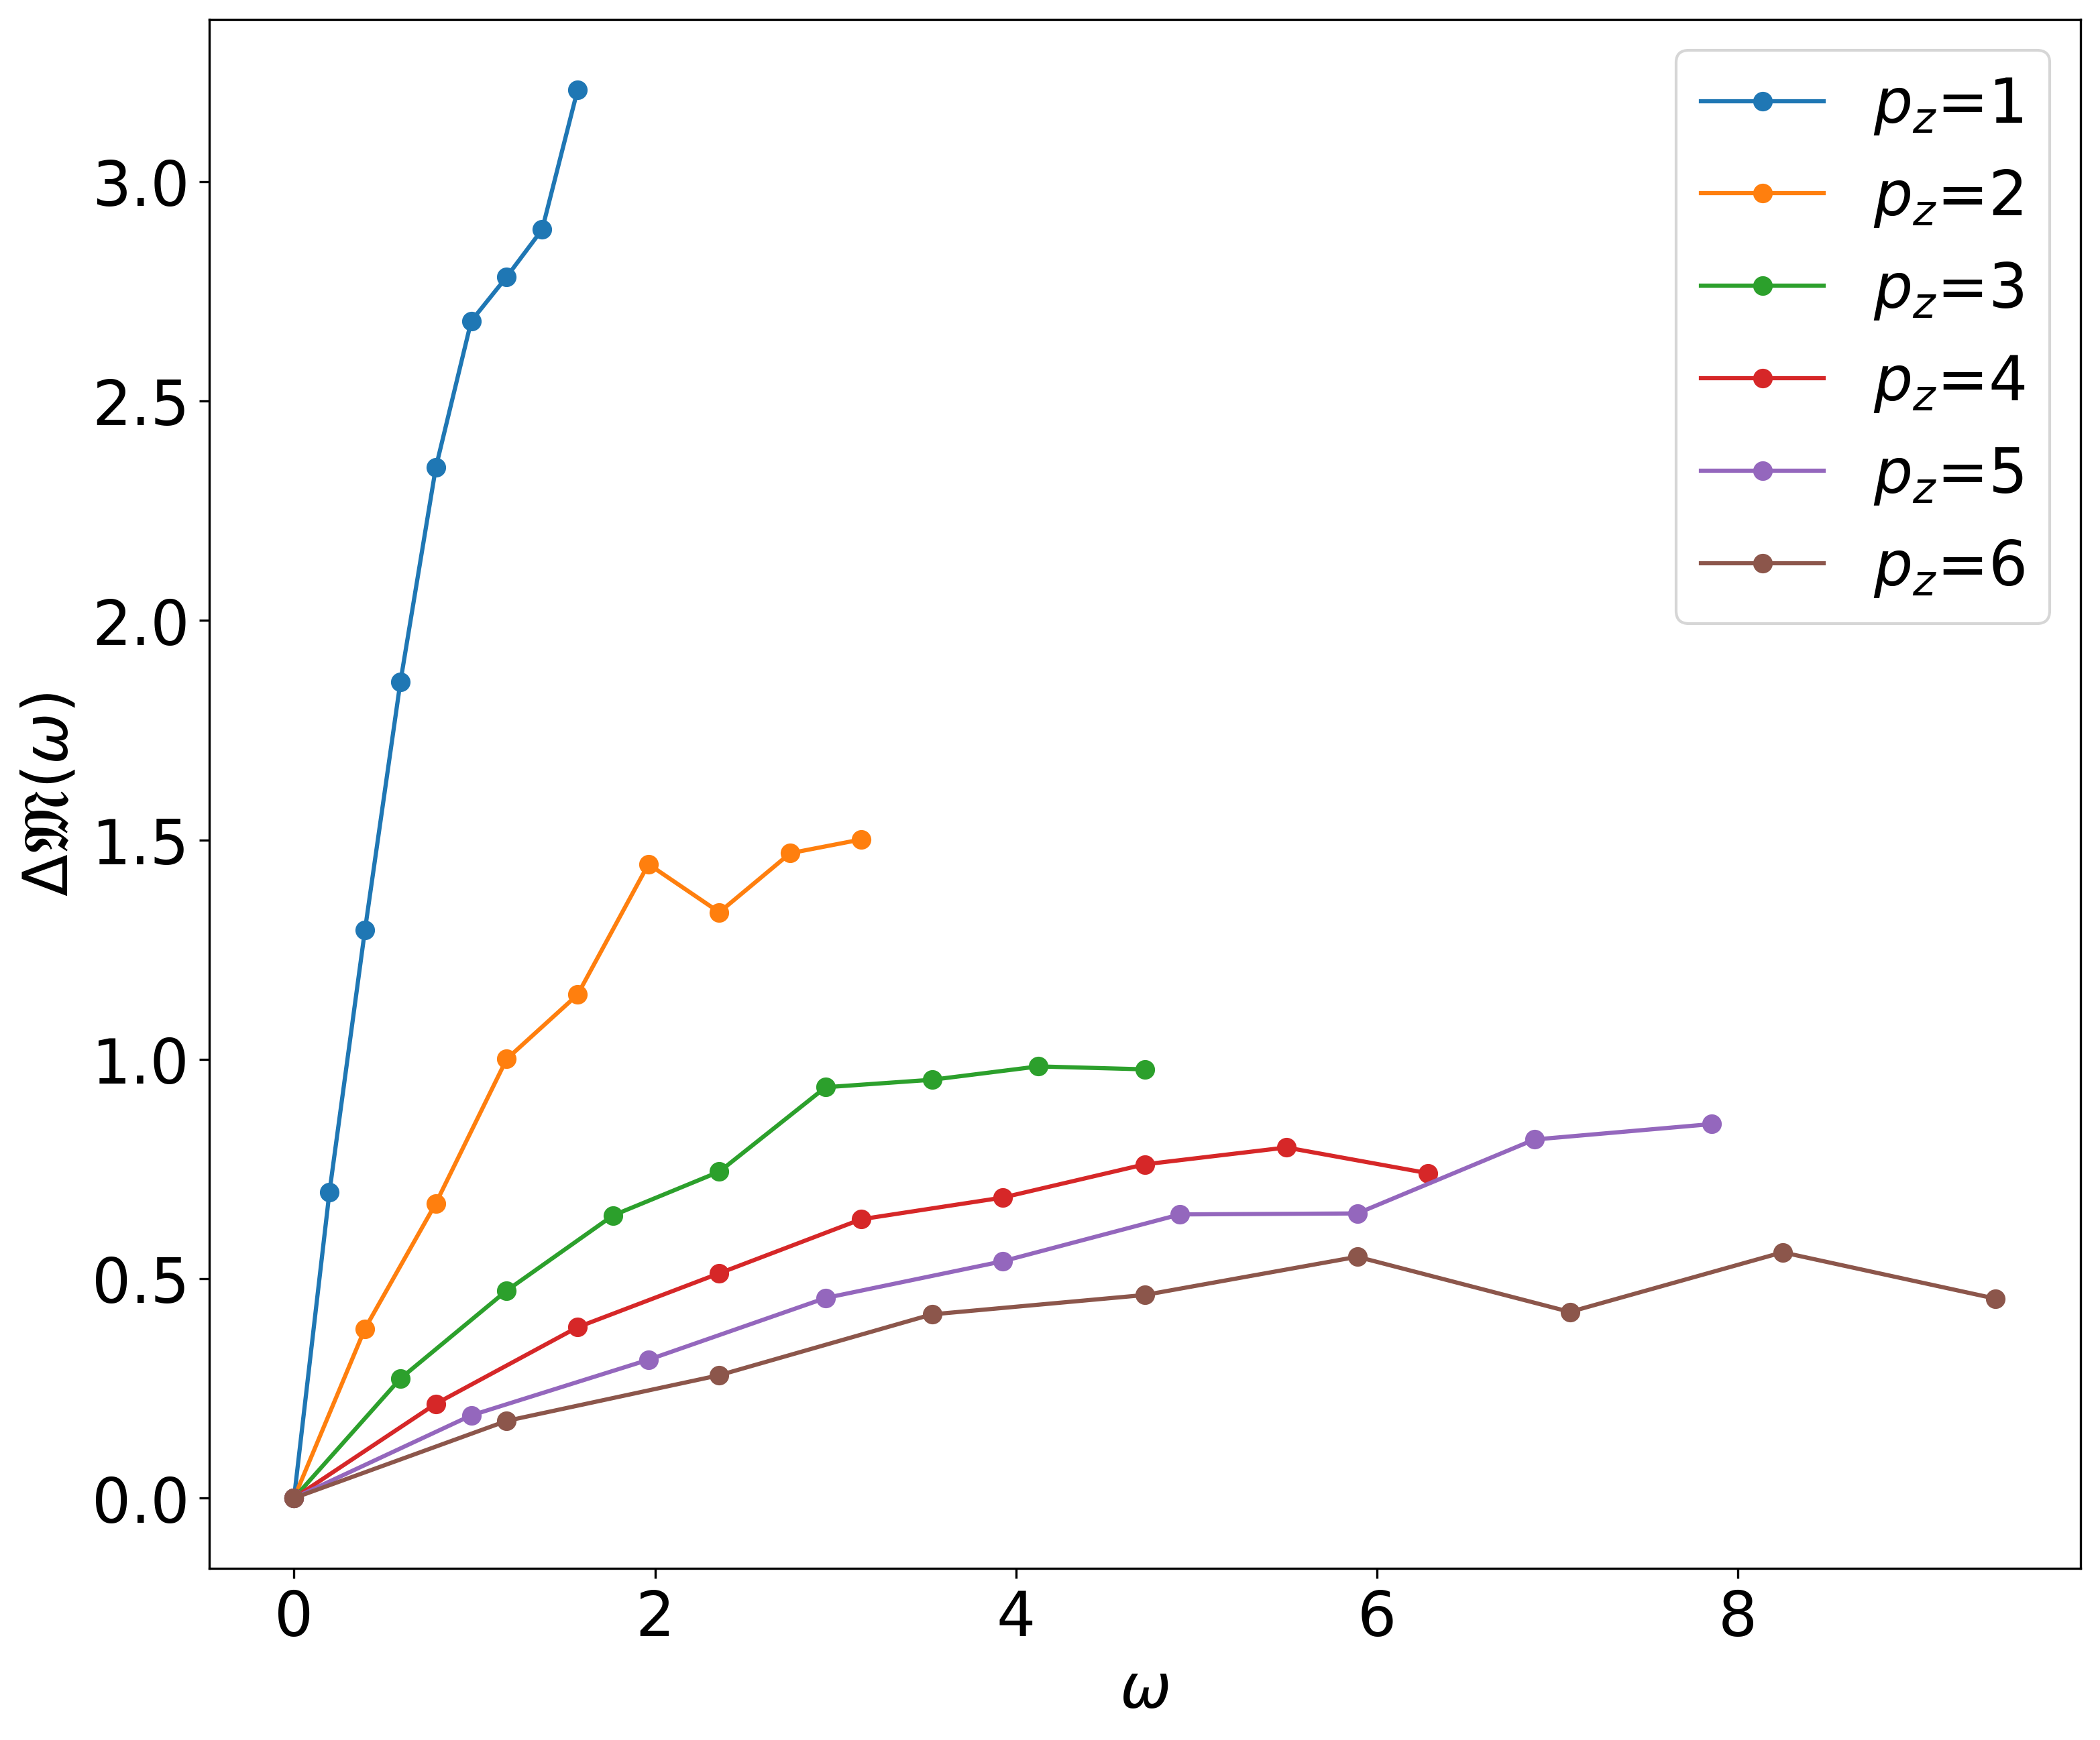

In [4]:
df_real = pd.read_csv('../Data/All_p_w_m.csv')
df_g = df_real.groupby(['P','W'])['M'].apply(lambda x: np.average(x)).reset_index()
df_g.columns = ['P','W', 'Mean_M']

plt.figure(dpi=300)
for p in range(1,7):
    t = df_g[df_g.P==p]
    #print(p,t.W.nunique())
    plt.plot(t.W, t.Mean_M, '-o', label=f"$p_z$={p}")
        
plt.xlabel('$\omega$')
plt.ylabel('$\Delta\mathfrak{M}(\omega)$')
plt.legend()
plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/P_W_M_curves.pdf', format='pdf', dpi=300)
plt.close()

plt.figure(dpi=300)
for p in range(1,7):
    t = df_g[df_g.P==p]
    #print(p,t.W.nunique())
    plt.plot(t.W, t.Mean_M, '-o', label=f"$p_z$={p}")

plt.xlabel('$\omega$')
plt.ylabel('$\Delta\mathfrak{M}(\omega)$')
plt.legend()
plt.show()

# Read the fitted curve for $I(\omega)$ and predict the values of $M(\omega, P_1)$ and $M(\omega, P_2)$
## Fit function for $m_1=M(\omega, P_1)$ and $m_2=M(\omega, P_2)$ are:
### $I = \frac{4}{3}m_2 - \frac{1}{3}m_1$
### $m_n = \frac{(n^2-1)\times I + m_1}{n^2}$

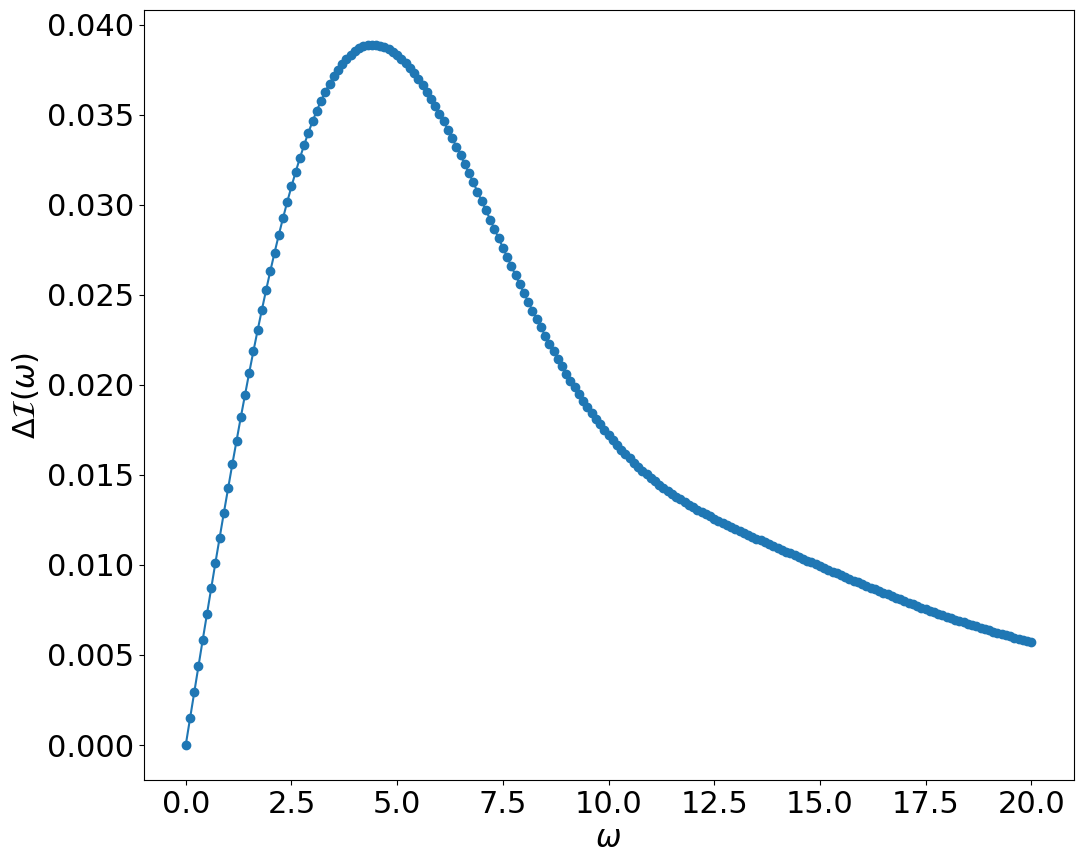

201


In [5]:
df_I = pd.read_csv('../Data/ITD-pol-fit1-line.txt', header=None, sep=' ')
df_I.columns = ['W', 'I']
plt.plot(df_I.W, df_I.I,'-o')
plt.xlabel('$\omega$')
plt.ylabel('$\Delta \mathcal{I}(\omega)$')
plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/I(w).pdf', format='pdf', dpi=300)
plt.close()

plt.plot(df_I.W, df_I.I,'-o')
plt.xlabel('$\omega$')
plt.ylabel('$\Delta \mathcal{I}(\omega)$')
plt.show()
print(df_I.W.nunique())

In [7]:
A,B = -1/3, 4/3
coeff = [A,B]
lr = 0.01
loss_val={'epoch':list(),'w':list(), 'loss':list()}
Epoc=100
t = []

def predict(x):
    return ((A*x[0])+(B*x[1]))

def lossFnc(f,y):
    return ((f-y)**2)

for i in df_I.index:
    W = df_I.W[i]
    Yreal = df_I.I[i]
    #m1=290.0
    m1,m2 = 310.0*Yreal, 0.0 
    
    for ep in range(1, Epoc):
        Ypred=predict([m1,m2])
        loss = lossFnc(Yreal,Ypred)
        
        loss_val['epoch'].append(ep)
        loss_val['w'].append(W)
        loss_val['loss'].append(loss)

        dm1=-2*A*(Yreal-Ypred)
        dm2=-2*B*(Yreal-Ypred)

        m1=m1-(lr*dm1)
        m2=m2-(lr*dm2)

    t.append({
        'W':W,
        'M1':m1,
        'M2':m2,
        'M3':((8*Yreal)+m1)/9,
        'M4':((15*Yreal)+m1)/16,
        'M5':((24*Yreal)+m1)/25,
        'M6':((35*Yreal)+m1)/36
    })

pd.DataFrame(loss_val).to_csv('../Data/loss_val.csv', index=False)
    
df_M=pd.DataFrame(t)
df_data = df_M.melt(id_vars='W', value_vars=['M1','M2','M3','M4','M5','M6'], var_name='P', value_name='Est_M')
df_data.P = [int(x[1]) for x in df_data.P]
print(df_data.shape)
df_data.to_csv('../Data/new_M.csv', index=False)

(1206, 3)


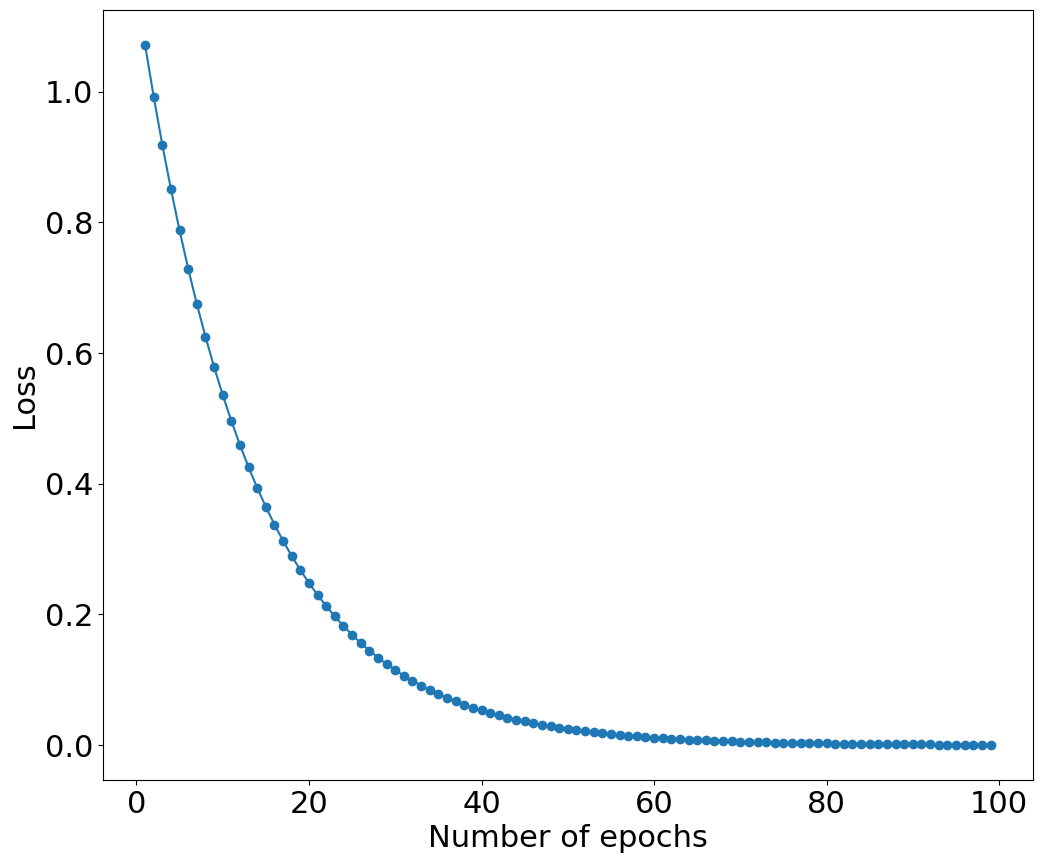

In [2]:
df_loss = pd.read_csv('../Data/loss_val.csv')
lv = df_loss[df_loss.w==15.0]
plt.plot(lv['epoch'], lv['loss'], '-o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/loss.pdf', format='pdf', dpi=300)
plt.close()

plt.plot(lv['epoch'], lv['loss'], '-o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

## Check both fitted and real values

In [3]:
df_real = pd.read_csv('../Data/All_p_w_m.csv')
print(df_real.shape)
df_M = pd.read_csv('../Data/new_M.csv')
print(df_M.shape)

(102654, 4)
(1206, 3)


In [36]:
df_real = pd.read_csv('../Data/All_p_w_m.csv')
df_g = df_real.groupby(['P','W'])['M'].apply(lambda x: np.average(x)).reset_index()
df_g.columns = ['P','W', 'Mean_M']
df_g.W = np.round(df_g.W,1)
#print(df_g.shape)
#display(df_g.head())

df_M = pd.read_csv('../Data/new_M.csv')
df_M.W = np.round(df_M.W,1)
#print(df_M.shape)
#display(df_M.head())

df_g.W = df_g.W*10
df_g.W = df_g.W.astype(int)
df_M.W = df_M.W*10
df_M.W = df_M.W.astype(int)

data = df_M.merge(df_g, on=['P','W'])
data.W = data.W/10

#print(data.shape)
#display(data.head())

"""
ax[r,c].plot(list_w, list_std, '-', label='Real',lw=5,ms=25, marker="^")
    ax[r,c].plot(list_w, pred_std, '-', label='Estimated',lw=5,ms=15, marker="o")
    ax[r,c].set_title(f"$p_z$={p}", fontsize=48)
    ax[r,c].set_xticklabels([str(round(x,1)) for x in ax[r,c].get_xticks()], fontsize=38)
    ax[r,c].set_yticklabels(ax[r,c].get_yticks(), fontsize=38)
    #ax[r,c].set_ylim(-0.0001, 0.006)
    ax[r,c].legend(prop={'size':42})
    #ax[r,c].grid()
"""

fig, ax = plt.subplots(2,3,dpi=300, figsize=(50,30), layout="constrained")
r,c=0,0
for p in range(1,7):
    tmp = data[data.P==p]
    
    ax[r,c].plot(tmp.W, tmp.Mean_M, '-', label='Real',lw=5,ms=25, marker="^")
    ax[r,c].plot(tmp.W, tmp.Est_M, '-', label='Estimated',lw=5,ms=25, marker="o")
    ax[r,c].set_title(f"$p_z$={p}", fontsize=48)
    ax[r,c].set_xticklabels([str(round(x,1)) for x in ax[r,c].get_xticks()], fontsize=38)
    ax[r,c].set_yticklabels([str(round(x,1)) for x in ax[r,c].get_yticks()], fontsize=38)
    ax[r,c].legend(prop={'size':42})
    #ax[r,c].grid()
    
    if p==1 or p==4:
        ax[r,c].set_ylabel('$\Delta\mathfrak{M}(\omega)$', fontsize=48)
    if p>3:
        ax[r,c].set_xlabel('$\omega$', fontsize=48)

    c+=1
    if p==3:
        r+=1
        c=0

plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/Fitted_M(w)_split.pdf', format='pdf', dpi=300)
plt.close()

fig, ax = plt.subplots(2,3,dpi=300, figsize=(50,30), layout="constrained")
r,c=0,0
for p in range(1,7):
    tmp = data[data.P==p]
    
    ax[r,c].plot(tmp.W, tmp.Mean_M, '-', label='Real',lw=5,ms=25, marker="^")
    ax[r,c].plot(tmp.W, tmp.Est_M, '-', label='Estimated',lw=5,ms=25, marker="o")
    ax[r,c].set_title(f"$p_z$={p}", fontsize=48)
    ax[r,c].set_xticklabels([str(round(x,1)) for x in ax[r,c].get_xticks()], fontsize=38)
    ax[r,c].set_yticklabels([str(round(x,1)) for x in ax[r,c].get_yticks()], fontsize=38)
    ax[r,c].legend(prop={'size':42})
    #ax[r,c].grid()
    
    if p==1 or p==4:
        ax[r,c].set_ylabel('$\Delta\mathfrak{M}(\omega)$', fontsize=48)
    if p>3:
        ax[r,c].set_xlabel('$\omega$', fontsize=48)

    c+=1
    if p==3:
        r+=1
        c=0

plt.show()

## Overlap both real and generated data

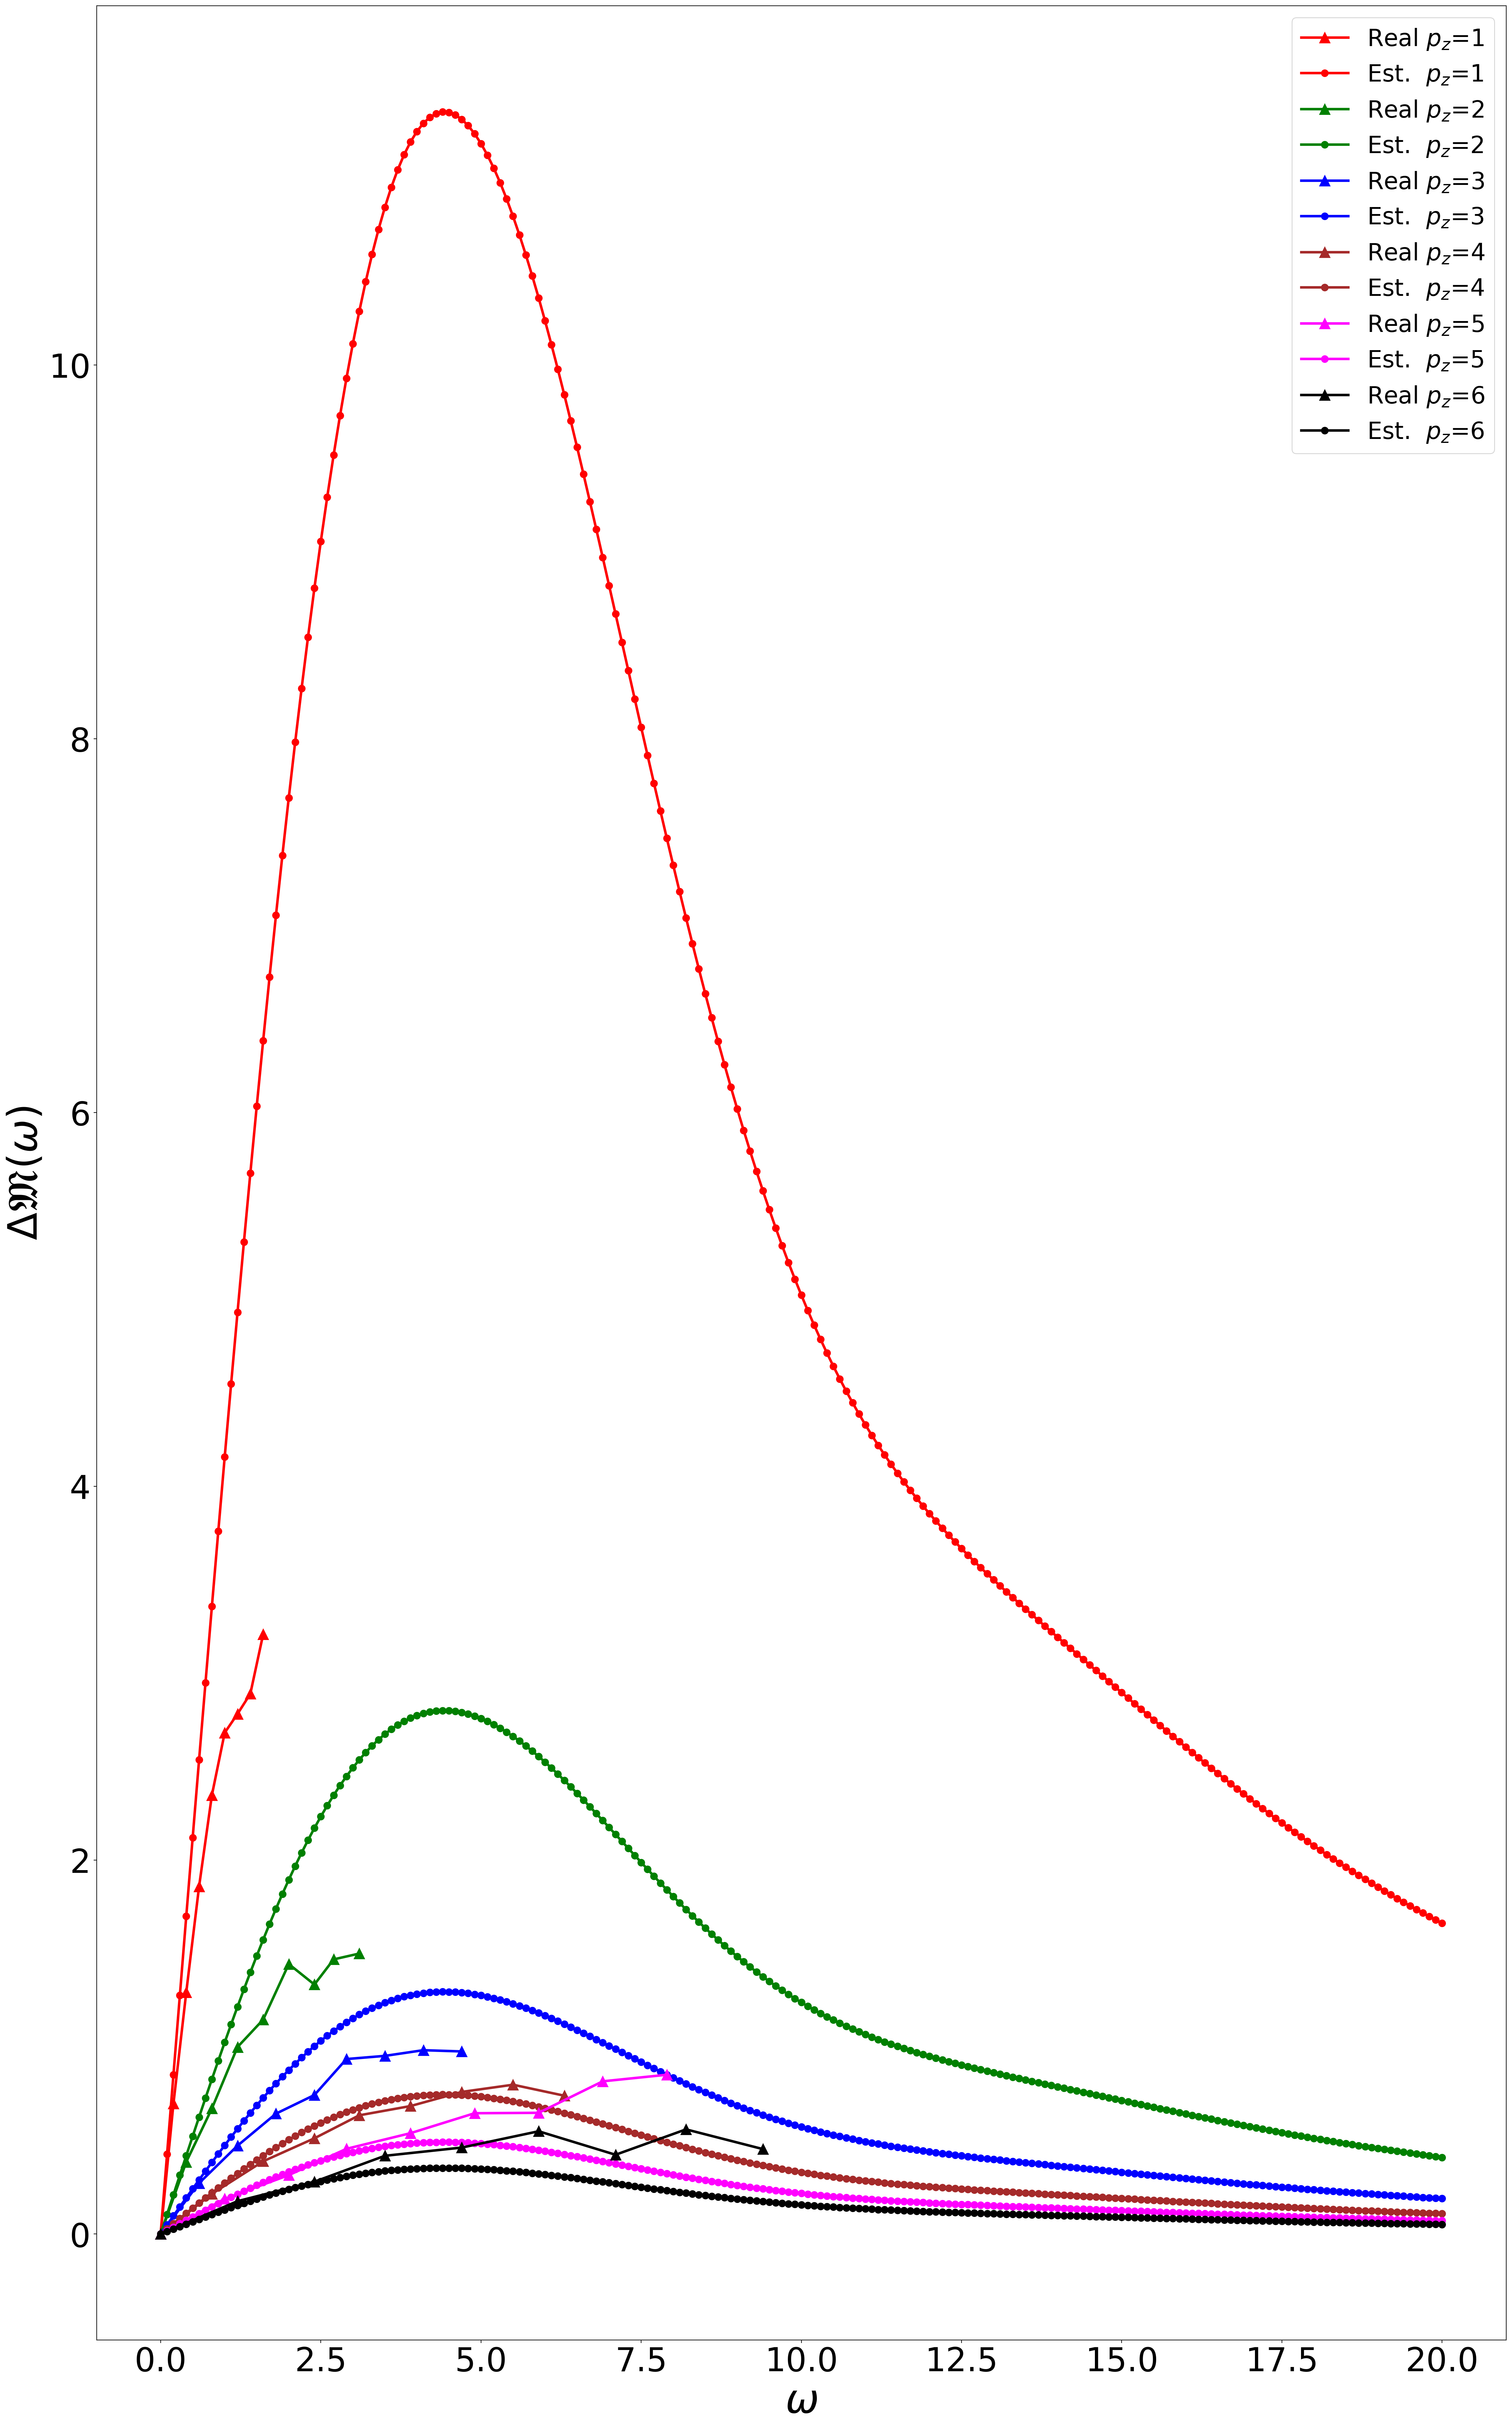

In [15]:
df_real = pd.read_csv('../Data/All_p_w_m.csv')
df_g = df_real.groupby(['P','W'])['M'].apply(lambda x: np.average(x)).reset_index()
df_g.columns = ['P','W', 'Mean_M']
df_g.W = np.round(df_g.W,1)

df_M = pd.read_csv('../Data/new_M.csv')
df_M.W = np.round(df_M.W,1)

plt.figure(dpi=200, figsize=(30,50))
cols = ['red','green','blue','brown','magenta','black']
for p in range(1,7):
    tmp = df_g[df_g.P==p]
    plt.plot(tmp.W, tmp.Mean_M, '-', label='Real $p_z$={}'.format(p), lw=3, ms=12, color=cols[p-1], marker="^")

    tmp = df_M[df_M.P==p]
    plt.plot(tmp.W, tmp.Est_M, '-', label='Est.  $p_z$={}'.format(p), lw=3, ms=8, color=cols[p-1], marker="o")

plt.xlabel("$\omega$", fontsize=48)
plt.ylabel("$\Delta\mathfrak{M}(\omega)$", fontsize=48)
plt.xticks(fontsize=39)
plt.yticks(fontsize=39)
plt.legend(loc='best', prop={'size':28})#bbox_to_anchor=[1.35, .5], loc='right')

plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/Fitted_M(w).pdf', format='pdf', dpi=300)
plt.close()

plt.figure(dpi=200, figsize=(30,50))
cols = ['red','green','blue','brown','magenta','black']
for p in range(1,7):
    tmp = df_g[df_g.P==p]
    plt.plot(tmp.W, tmp.Mean_M, '-', label='Real $p_z$={}'.format(p), lw=3, ms=12, color=cols[p-1], marker="^")

    tmp = df_M[df_M.P==p]
    plt.plot(tmp.W, tmp.Est_M, '-', label='Est.  $p_z$={}'.format(p), lw=3, ms=8, color=cols[p-1], marker="o")

plt.xlabel("$\omega$", fontsize=48)
plt.ylabel("$\Delta\mathfrak{M}(\omega)$", fontsize=48)
plt.xticks(fontsize=39)
plt.yticks(fontsize=39)
plt.legend(loc='best', prop={'size':28})#bbox_to_anchor=[1.35, .5], loc='right')

plt.show()

## Regression analysis on standard deviation values

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df_real = pd.read_csv('../Data/All_p_w_m.csv')
td = []

for lwi in range(4,10):
    for p in range(1,7):
        w1 = df_real.W[df_real.P==p].unique()
        #print(len(w1))
        list_w, list_std = [],[]
        for w in w1[:lwi]:
            t = df_real[np.logical_and(df_real.W==w, df_real.P==p)]
            list_w.append(w)
            list_std.append(np.std(t.M))

        tmp = pd.DataFrame({'W':list_w, 'S':list_std})
        X = np.array(tmp.W).reshape(-1, 1)
        y = tmp.S.values.ravel()

        bestModel = LinearRegression(fit_intercept=False).fit(X, y)
        pred_std = bestModel.predict(X)

        r2 = r2_score(y, pred_std)
        rms = np.sqrt(mean_squared_error(y, pred_std))
        td.append([p,len(list_w),r2,rms*10**4])
        
td = pd.DataFrame(td, columns=['P','WL','R2','RMS'])
td.to_csv('../Data/RMS.csv', index=False)
td.head()

P  WL        R2       RMS
0  1   4  0.988475  1.524878
1  2   4  0.988589  0.849492
2  3   4  0.933022  1.323862
3  4   4  0.994805  0.352581
4  5   4  0.971602  0.881321

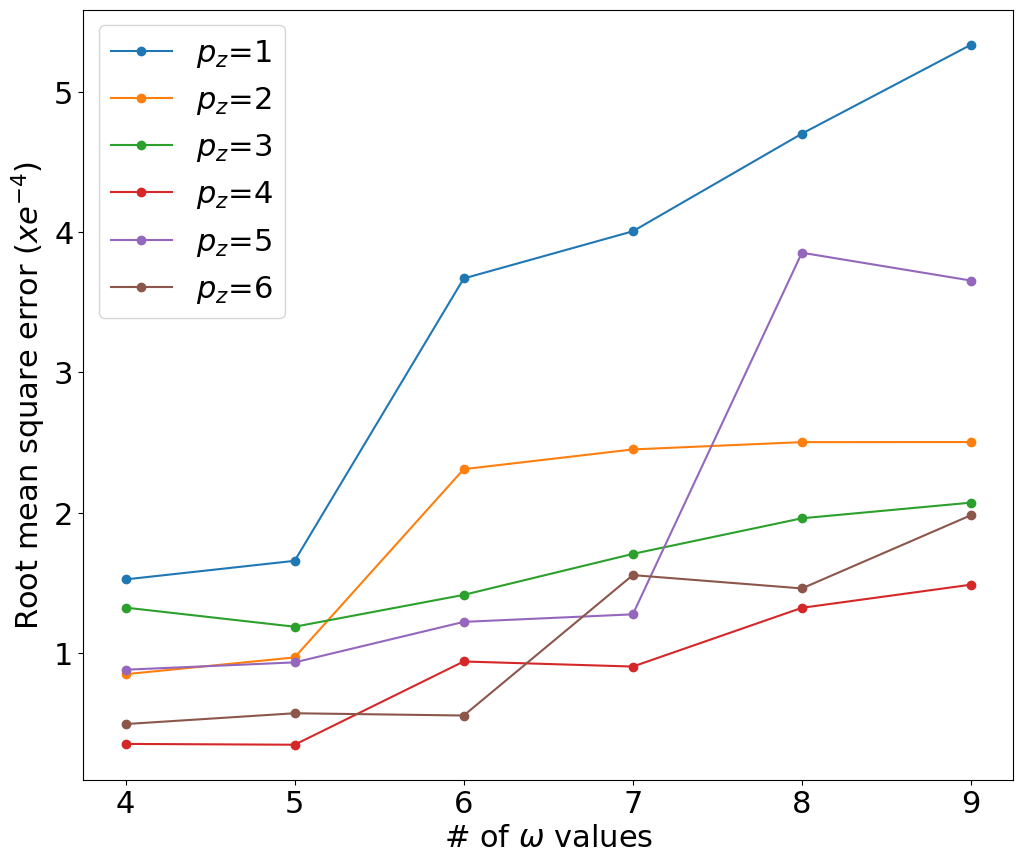

In [16]:
for p in [1,2,3,4,5,6]:
    t = td[td.P==p]
    plt.plot(t.WL, t.RMS, '-o', label=f"$p_z$={p}")
    
plt.xlabel('# of $\omega$ values')
plt.ylabel("Root mean square error ($x e^{-4}$)")
plt.legend()

plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/std_match_omega.pdf', format='pdf', dpi=300)
plt.close()

for p in [1,2,3,4,5,6]:
    t = td[td.P==p]
    plt.plot(t.WL, t.RMS, '-o', label=f"$p_z$={p}")
    
plt.xlabel('# of $\omega$ values')
plt.ylabel("Root mean square error ($x e^{-4}$)")
plt.legend()

plt.show()

In [18]:
for p in range(1,7):
    w1 = df_real.W[df_real.P==p].unique()
    list_w, list_std = [],[]
    for w in w1:#[:-4]:
        t = df_real[np.logical_and(df_real.W==w, df_real.P==p)]
        list_w.append(w)
        list_std.append(np.std(t.M))
    
    tmp = pd.DataFrame({'W':list_w, 'S':list_std})
    X = np.array(tmp.W).reshape(-1, 1)
    y = tmp.S.values.ravel()

    bestModel = LinearRegression(fit_intercept=False,).fit(X, y)
    pred_std = bestModel.predict(X)
    r2 = r2_score(pred_std, y)
    print(X[-2][0]-X[-4][0])
    break

0.39269999999999994


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_real = pd.read_csv('../Data/All_p_w_m.csv')

fig, ax = plt.subplots(2,3,dpi=200, figsize=(50,30), layout="constrained", sharey=True)
r,c=0,0
model_LR=[]

for p in range(1,7):
    w1 = df_real.W[df_real.P==p].unique()
    list_w, list_std = [],[]
    for w in w1:#[:-4]:
        t = df_real[np.logical_and(df_real.W==w, df_real.P==p)]
        list_w.append(w)
        list_std.append(np.std(t.M))
    
    tmp = pd.DataFrame({'W':list_w, 'S':list_std})
    X = np.array(tmp.W).reshape(-1, 1)
    y = tmp.S.values.ravel()

    bestModel = LinearRegression(fit_intercept=False,).fit(X, y)
    pred_std = bestModel.predict(X)
    r2 = r2_score(pred_std, y)
    slope = (y[-2]-y[-4])/(X[-2][0]-X[-4][0])
    
    ax[r,c].plot(list_w, list_std, '-', label='Real',lw=5,ms=25, marker="^")
    ax[r,c].plot(list_w, pred_std, '-', label='Estimated',lw=5,ms=15, marker="o")
    ax[r,c].set_title(f"$p_z$={p}, slope={slope:.2e}", fontsize=48, y=0.96, pad=-10)
    ax[r,c].set_xticklabels([str(round(x,1)) for x in ax[r,c].get_xticks()], fontsize=38)
    ax[r,c].set_yticklabels(ax[r,c].get_yticks(), fontsize=38)
    #ax[r,c].set_ylim(-0.0001, 0.006)
    if r==0 and c==0:
        ax[r,c].legend(prop={'size':42}, loc='lower right')
    #ax[r,c].grid()
    
    model_LR.append(bestModel)
    
    if p==1 or p==4:
        ax[r,c].set_ylabel('Std. dev. of $\Delta\mathfrak{M}(\omega)$', fontsize=68)
    if p>3:
        ax[r,c].set_xlabel('$\omega$', fontsize=68)

    c+=1
    if p==3:
        r+=1
        c=0

plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/est_std_lr.pdf', format='pdf', dpi=300)
plt.close()

fig, ax = plt.subplots(2,3,dpi=200, figsize=(50,30), layout="constrained", sharey=True)
r,c=0,0
model_LR=[]

for p in range(1,7):
    w1 = df_real.W[df_real.P==p].unique()
    list_w, list_std = [],[]
    for w in w1:#[:-4]:
        t = df_real[np.logical_and(df_real.W==w, df_real.P==p)]
        list_w.append(w)
        list_std.append(np.std(t.M))
    
    tmp = pd.DataFrame({'W':list_w, 'S':list_std})
    X = np.array(tmp.W).reshape(-1, 1)
    y = tmp.S.values.ravel()

    bestModel = LinearRegression(fit_intercept=False,).fit(X, y)
    pred_std = bestModel.predict(X)
    r2 = r2_score(pred_std, y)
    slope = (y[-2]-y[-4])/(X[-2][0]-X[-4][0])
    
    ax[r,c].plot(list_w, list_std, '-', label='Real',lw=5,ms=25, marker="^")
    ax[r,c].plot(list_w, pred_std, '-', label='Estimated',lw=5,ms=15, marker="o")
    ax[r,c].set_title(f"$p_z$={p}, slope={slope:.2e}", fontsize=48, y=0.96, pad=-10)
    ax[r,c].set_xticklabels([str(round(x,1)) for x in ax[r,c].get_xticks()], fontsize=38)
    ax[r,c].set_yticklabels(ax[r,c].get_yticks(), fontsize=38)
    #ax[r,c].set_ylim(-0.0001, 0.006)
    if r==0 and c==0:
        ax[r,c].legend(prop={'size':42}, loc='lower right')
    #ax[r,c].grid()
    
    model_LR.append(bestModel)
    
    if p==1 or p==4:
        ax[r,c].set_ylabel('Std. dev. of $\Delta\mathfrak{M}(\omega)$', fontsize=68)
    if p>3:
        ax[r,c].set_xlabel('$\omega$', fontsize=68)

    c+=1
    if p==3:
        r+=1
        c=0

plt.show()

## Dist of $M(p, \omega)$

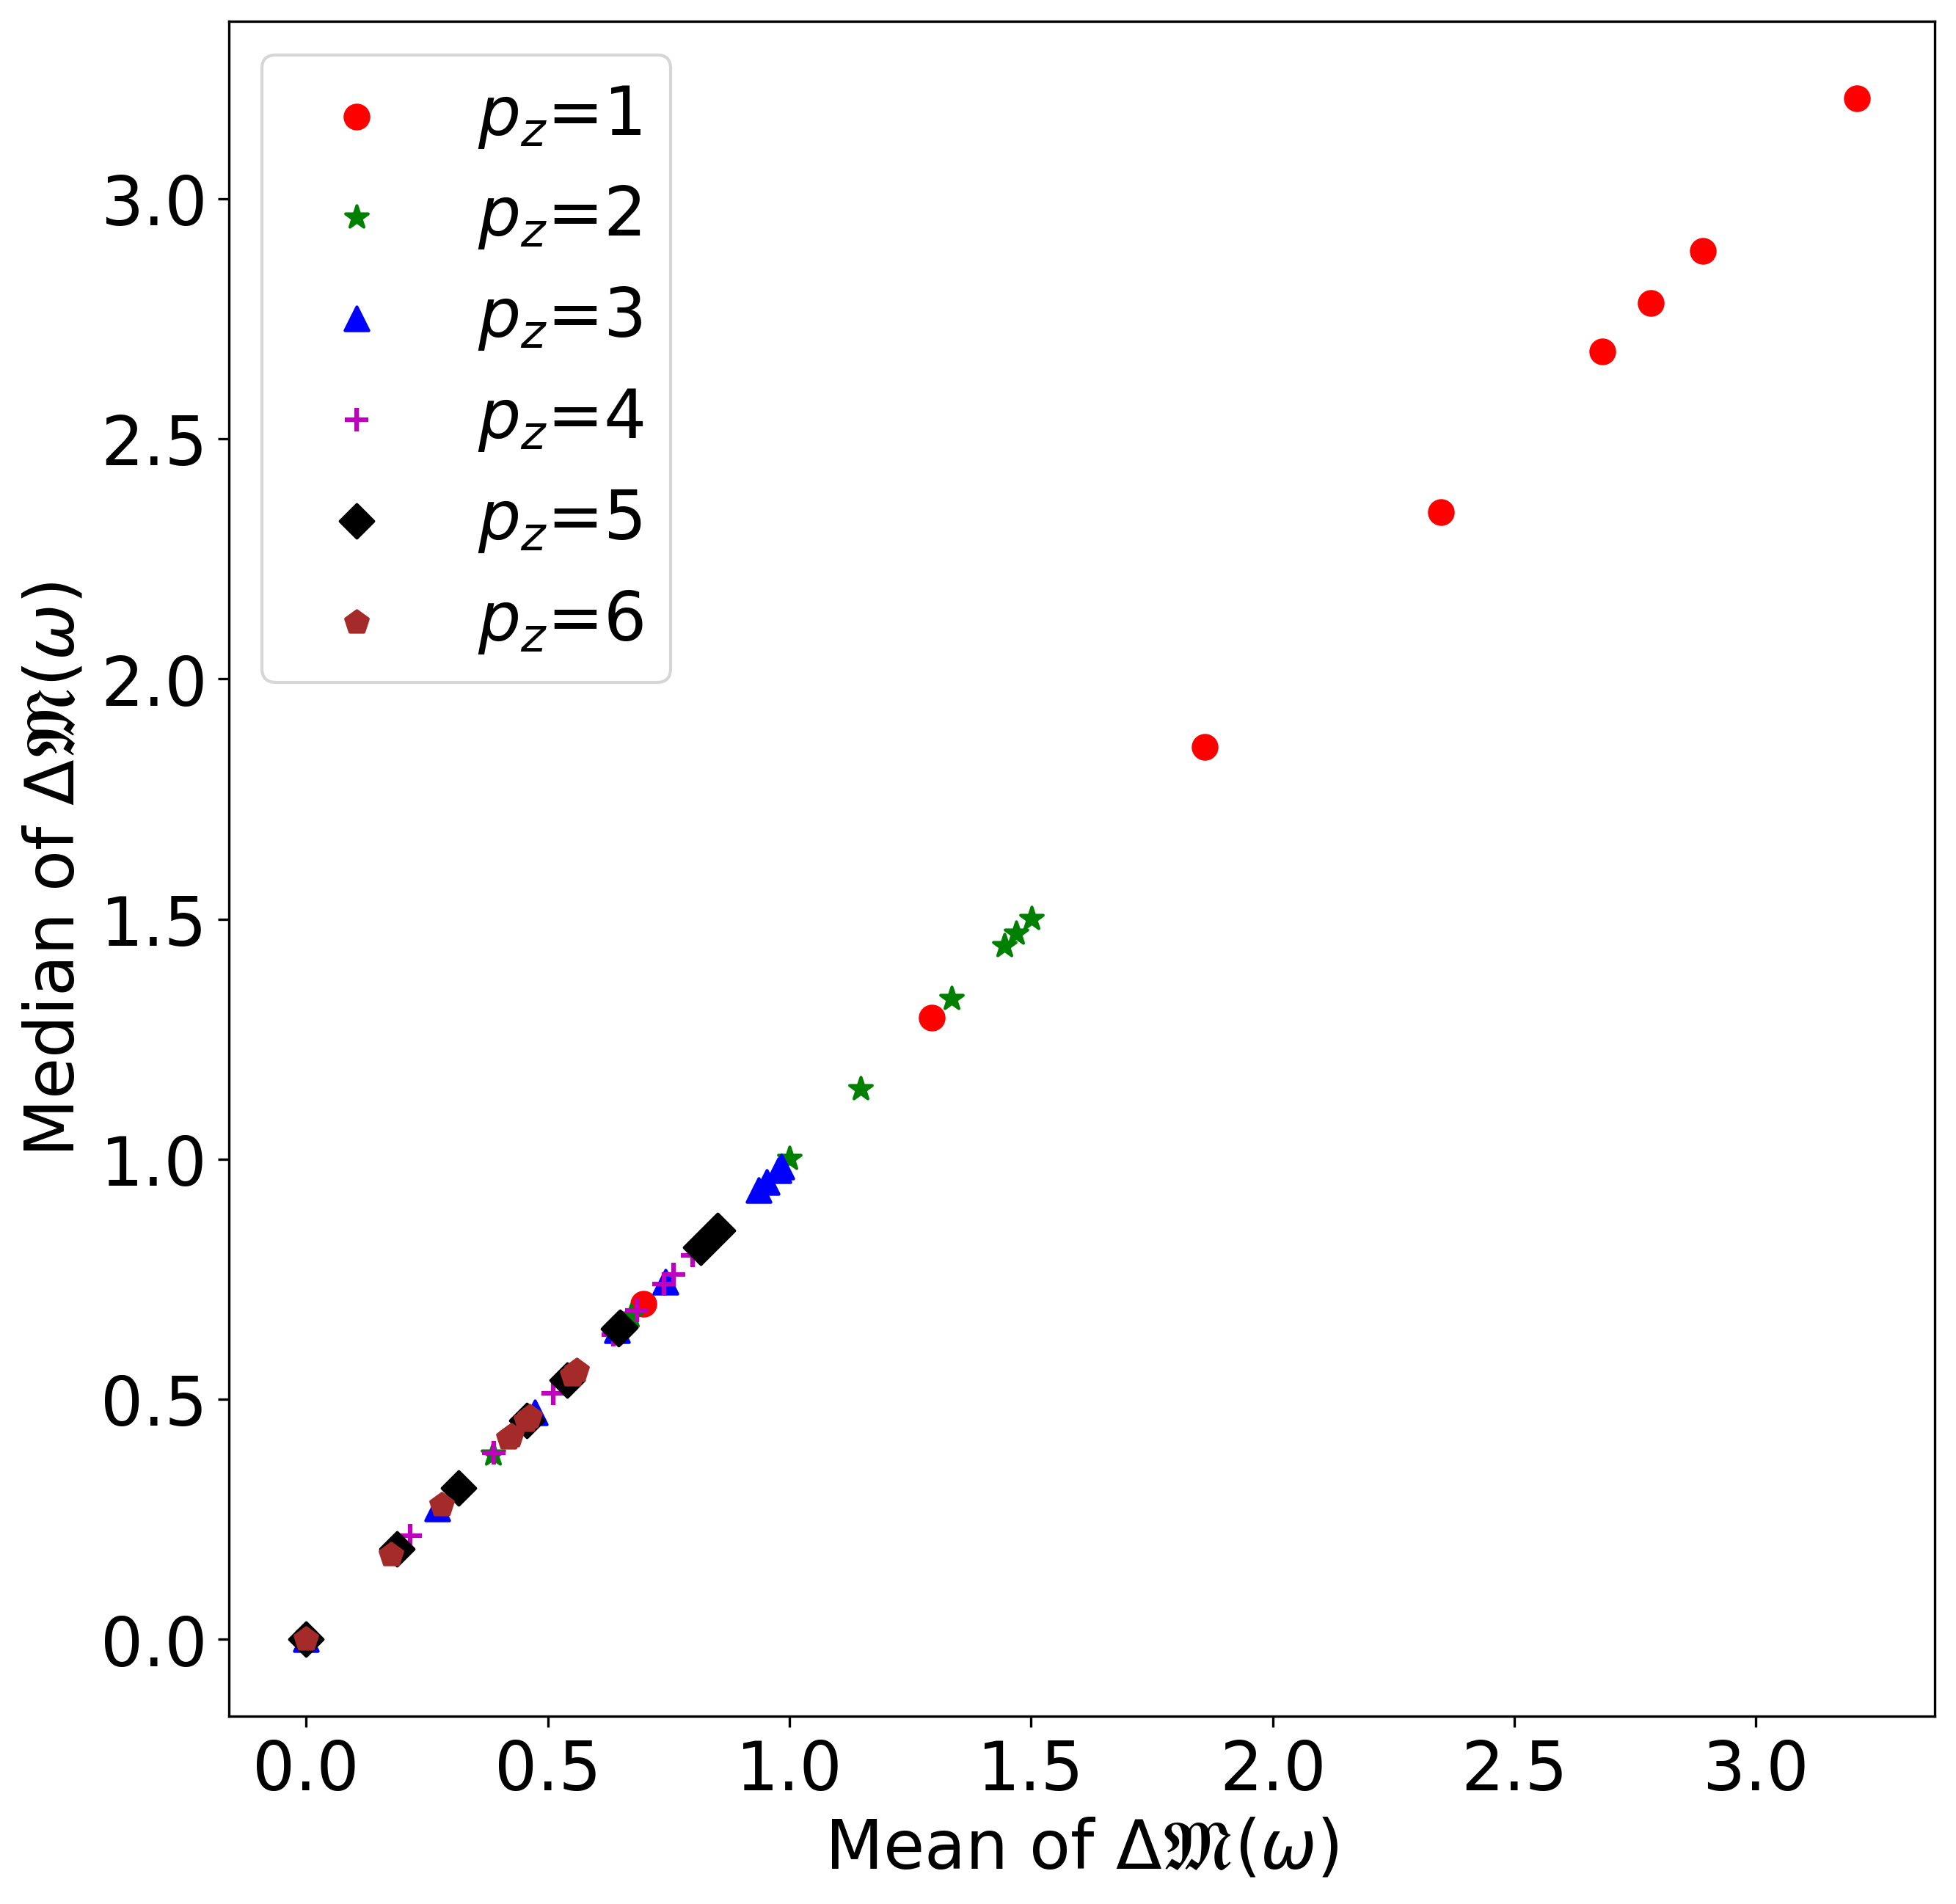

In [31]:
df_real = pd.read_csv('../Data/All_p_w_m.csv')
v = []
for p in range(1,7):
    w1 = df_real.W[df_real.P==p].unique()
    for w in w1:
        mv = df_real.M[np.logical_and(df_real.W==w, df_real.P==p)]
        a = np.round(np.mean(mv), 3)
        b = np.round(np.median(mv), 3)
        v.append([p,w,a,b,np.abs(a-b)])

t = pd.DataFrame(v, columns=['P','W','Mean','Median','Skewness'])
c = ['r','g','b','m','black','brown']
mk = ['o','*','^','+','D','p']

plt.figure(figsize=(10,10), dpi=300)
for p in t.P.unique():
    tmp = t[t.P==p]
    plt.scatter(tmp.Mean, tmp.Median, color=c[p-1], s=60, marker=mk[p-1], label=f"$p_z$={p}")
    
plt.xlabel('Mean of $\Delta\mathfrak{M}(\omega)$')    
plt.ylabel('Median of $\Delta\mathfrak{M}(\omega)$')
plt.legend()

plt.savefig('../../../Paper/64dd2039f9124c536bf84fa0/Gluon_PDF_with_ML/figures/dist_P_W.pdf', format='pdf', dpi=300)
plt.close()

plt.figure(figsize=(10,10), dpi=300)
for p in t.P.unique():
    tmp = t[t.P==p]
    plt.scatter(tmp.Mean, tmp.Median, color=c[p-1], s=60, marker=mk[p-1], label=f"$p_z$={p}")
    
plt.xlabel('Mean of $\Delta\mathfrak{M}(\omega)$')    
plt.ylabel('Median of $\Delta\mathfrak{M}(\omega)$')
plt.legend()

plt.show()

## Compute standard deviation for the newly generated data

In [23]:
model_LR

[LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False),
 LinearRegression(fit_intercept=False)]

In [24]:
df_M['Est_S'] = 0.0
for p in df_M.P.unique():
    df_M.loc[df_M.P==p, 'Est_S'] = model_LR[p-1].predict(df_M.W[df_M.P==p].values.reshape(-1, 1))
    #print(len(df_data.W), len(stdVal), stdVal[:10])
    
df_M.Est_S[df_M.W==0.0] = 0.0
df_M.to_csv('../Data/new_M_S.csv', index=False)
df_M.head()

W  P     Est_M     Est_S
0  0.0  1  0.000000  0.000000
1  0.1  1  0.426763  0.000816
2  0.2  1  0.852853  0.001632
3  0.3  1  1.277595  0.002449
4  0.4  1  1.700321  0.003265

## Generate 1901 values based on NormalDist($\mu$=M and $\sigma$=stdVal)

In [25]:
df_data = pd.read_csv('../Data/new_M_S.csv')
cols = []
for i in range(1, 1902):
    c = f'E{i}'
    cols.append(c)
    df_data.loc[:,c] = df_data.Est_M
    
df_exp_data = df_data.melt(id_vars=['W','P','Est_M','Est_S'], value_vars=cols, value_name='M', var_name='Exp')
del[df_data]
df_exp_data.Exp = [int(x[1:]) for x in df_exp_data.Exp]
df_exp_data.head()

W  P     Est_M     Est_S  Exp         M
0  0.0  1  0.000000  0.000000    1  0.000000
1  0.1  1  0.426763  0.000816    1  0.426763
2  0.2  1  0.852853  0.001632    1  0.852853
3  0.3  1  1.277595  0.002449    1  1.277595
4  0.4  1  1.700321  0.003265    1  1.700321

In [26]:
df_exp_data.Exp.nunique()

1901

In [27]:
from numpy.random import seed
from numpy.random import normal

for p in df_exp_data.P.unique():
    seed(p)
    
    for w in df_exp_data.W[df_exp_data.P==p].unique():
        t = df_exp_data.loc[np.logical_and(df_exp_data.W==w, df_exp_data.P==p), ['Est_M', 'Est_S']].drop_duplicates()
        mu = t.Est_M.values[0]
        sigma = t.Est_S.values[0]

        #generate sample of 1901 values that follow a normal distribution 
        #expData = normal(loc=mu, scale=sigma, size=1901)
        df_exp_data.loc[np.logical_and(df_exp_data.W==w, df_exp_data.P==p), 'M'] = normal(loc=mu, scale=sigma, size=1901)
        #if len(set(expData)) != 1901:
        #    print(p, w, mu, sigma, len(expData), len(set(expData)))
        
df_exp_data.head()

W  P     Est_M     Est_S  Exp         M
0  0.0  1  0.000000  0.000000    1  0.000000
1  0.1  1  0.426763  0.000816    1  0.425324
2  0.2  1  0.852853  0.001632    1  0.854600
3  0.3  1  1.277595  0.002449    1  1.281640
4  0.4  1  1.700321  0.003265    1  1.698087

In [28]:
df_exp_data.M[df_exp_data.W==0.0].sum()

0.0

In [29]:
df_exp_data.to_csv('../Data/generated_Synthetic_exp_data.csv', index=False)